In [16]:
# Importing pandas for data manipulation and analysis
import pandas as pd
# Importing numpy for numerical operations and array handling
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Superstore.csv", encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
# Create a new column 'Sales_per_Unit' by dividing total Sales by Quantity
# This shows how much each unit of product sold for
df['Sales_per_Unit'] = df['Sales'] / df['Quantity']


In [4]:
df.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Sales_per_Unit    0
dtype: int64

In [5]:
# Create Profit Margin column
df['Profit_Margin'] = df['Profit'] / df['Sales']

# Flag low profit orders (less than 10% margin)
df['Low_Profit_Flag'] = np.where(df['Profit_Margin'] < 0.1, True, False)

# Check first 5 rows
df[['Sales','Profit','Profit_Margin','Low_Profit_Flag']].head()

,Sales,Profit,Profit_Margin,Low_Profit_Flag
0,261.9600,41.9136,0.1600,False
1,731.9400,219.5820,0.3000,False
2,14.6200,6.8714,0.4700,False
3,957.5775,-383.0310,-0.4000,True
4,22.3680,2.5164,0.1125,False


In [6]:
# Count missing values in each column
missing_values = df.isna().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 Row ID             0
Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment            0
Country            0
City               0
State              0
Postal Code        0
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit             0
Sales_per_Unit     0
Profit_Margin      0
Low_Profit_Flag    0
dtype: int64


In [7]:
# Count duplicate rows
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# Drop duplicates if any
df = df.drop_duplicates()

Number of duplicate rows: 0


In [8]:
# Negative Sales
neg_sales = df[df['Sales'] <= 0]
print("Rows with negative or zero sales:", len(neg_sales))

# Negative Profit
neg_profit = df[df['Profit'] < 0]
print("Rows with negative profit:", len(neg_profit))

Rows with negative or zero sales: 0
Rows with negative profit: 1871


In [9]:
# Ensure numeric columns are numeric
numeric_cols = ['Sales','Quantity','Discount','Profit']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Ensure dates are datetime type
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

     

# Month in 'YYYY-MM' format
df['Order_Month'] = df['Order Date'].dt.to_period('M').astype(str)

# Weekday name
df['Order_Weekday'] = df['Order Date'].dt.day_name()

In [10]:
df.info()   # check column types, missing values
df.head()   # check first 5 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Row ID           9994 non-null   int64         
 1   Order ID         9994 non-null   object        
 2   Order Date       9994 non-null   datetime64[ns]
 3   Ship Date        9994 non-null   datetime64[ns]
 4   Ship Mode        9994 non-null   object        
 5   Customer ID      9994 non-null   object        
 6   Customer Name    9994 non-null   object        
 7   Segment          9994 non-null   object        
 8   Country          9994 non-null   object        
 9   City             9994 non-null   object        
 10  State            9994 non-null   object        
 11  Postal Code      9994 non-null   int64         
 12  Region           9994 non-null   object        
 13  Product ID       9994 non-null   object        
 14  Category         9994 non-null   object 

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product Name,Sales,Quantity,Discount,Profit,Sales_per_Unit,Profit_Margin,Low_Profit_Flag,Order_Month,Order_Weekday
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,130.9800,0.1600,False,2016-11,Tuesday
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,243.9800,0.3000,False,2016-11,Tuesday
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,7.3100,0.4700,False,2016-06,Sunday
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,191.5155,-0.4000,True,2015-10,Sunday
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.1840,0.1125,False,2015-10,Sunday


In [11]:
total_sales = df['Sales'].sum()
avg_profit = df['Profit'].mean()
std_discount = df['Discount'].std()

print("Total Sales:", total_sales)
print("Average Profit:", avg_profit)
print("Standard Deviation of Discount:", std_discount)

Total Sales: 2297200.8603000003
Average Profit: 28.65689630778467
Standard Deviation of Discount: 0.2064519678256984


In [12]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Products by Sales:")
print(top_products)


Top 5 Products by Sales:
Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
Name: Sales, dtype: float64


In [13]:
profit_by_region = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)
print("\nMost Profitable Regions:")
print(profit_by_region)


Most Profitable Regions:
Region
West       108418.4489
East        91522.7800
South       46749.4303
Central     39706.3625
Name: Profit, dtype: float64


In [14]:
# Sales by Category
sales_by_category = df.groupby('Category')['Sales'].sum()
print("\nSales by Product Category:")
print(sales_by_category)

# Sales by Region
sales_by_region = df.groupby('Region')['Sales'].sum()
print("\nSales by Region:")
print(sales_by_region)


Sales by Product Category:
Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64

Sales by Region:
Region
Central    501239.8908
East       678781.2400
South      391721.9050
West       725457.8245
Name: Sales, dtype: float64


In [15]:
monthly_sales = df.groupby('Order_Month')['Sales'].sum()
print("\nMonthly Sales Trends:")
print(monthly_sales)


Monthly Sales Trends:
Order_Month
2014-01     14236.8950
2014-02      4519.8920
2014-03     55691.0090
2014-04     28295.3450
2014-05     23648.2870
2014-06     34595.1276
2014-07     33946.3930
2014-08     27909.4685
2014-09     81777.3508
2014-10     31453.3930
2014-11     78628.7167
2014-12     69545.6205
2015-01     18174.0756
2015-02     11951.4110
2015-03     38726.2520
2015-04     34195.2085
2015-05     30131.6865
2015-06     24797.2920
2015-07     28765.3250
2015-08     36898.3322
2015-09     64595.9180
2015-10     31404.9235
2015-11     75972.5635
2015-12     74919.5212
2016-01     18542.4910
2016-02     22978.8150
2016-03     51715.8750
2016-04     38750.0390
2016-05     56987.7280
2016-06     40344.5340
2016-07     39261.9630
2016-08     31115.3743
2016-09     73410.0249
2016-10     59687.7450
2016-11     79411.9658
2016-12     96999.0430
2017-01     43971.3740
2017-02     20301.1334
2017-03     58872.3528
2017-04     36521.5361
2017-05     44261.1102
2017-06     52981.7257

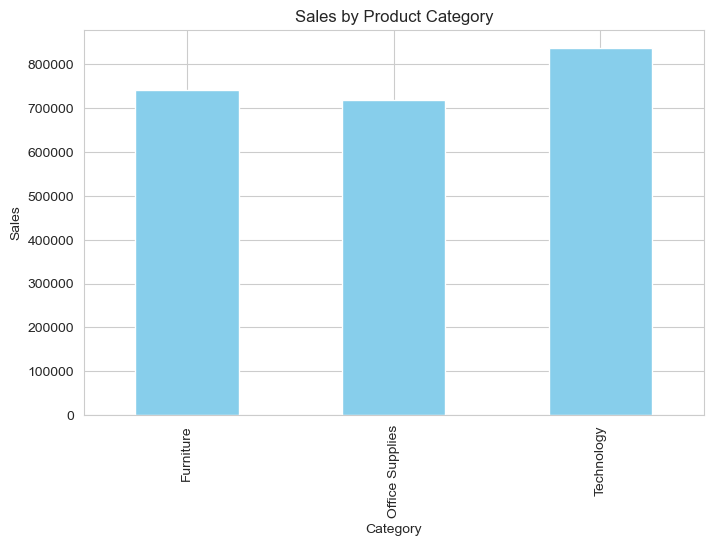

In [21]:
# Optional: make plots look better
sns.set_style("whitegrid")
%matplotlib inline


sales_by_category = df.groupby('Category')['Sales'].sum()

plt.figure(figsize=(8,5))
sales_by_category.plot(kind='bar', color='skyblue')
plt.title("Sales by Product Category")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.show()

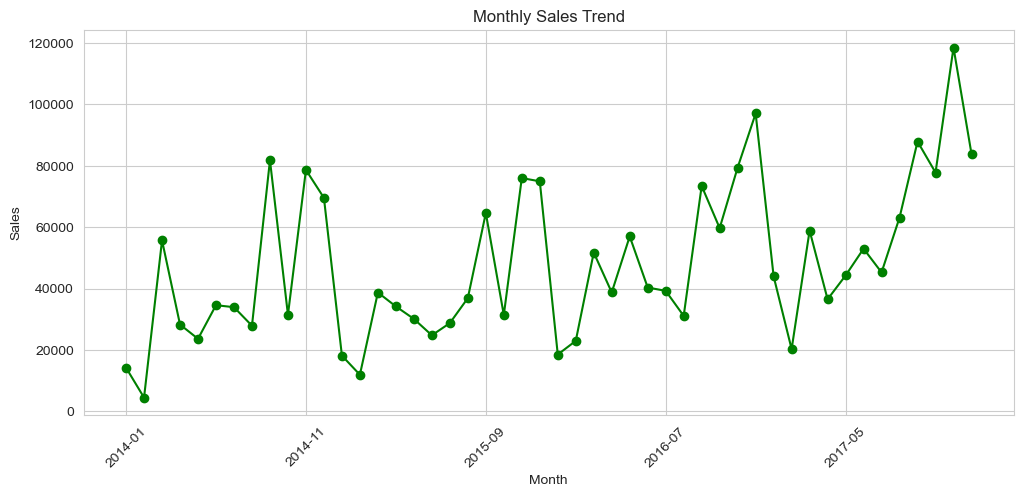

In [22]:
monthly_sales = df.groupby('Order_Month')['Sales'].sum()

plt.figure(figsize=(12,5))
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()


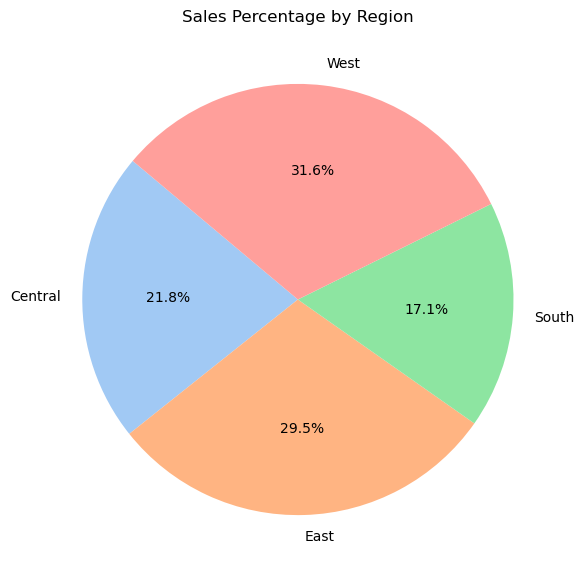

In [19]:
sales_by_region = df.groupby('Region')['Sales'].sum()

plt.figure(figsize=(7,7))
sales_by_region.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Sales Percentage by Region")
plt.ylabel("")
plt.show()

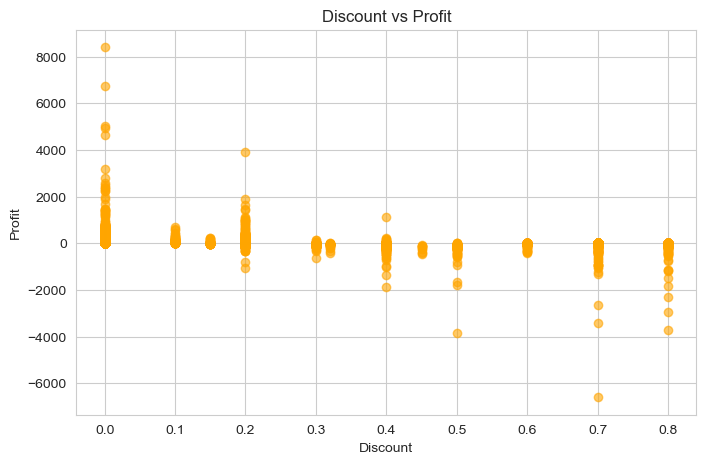

In [23]:

plt.figure(figsize=(8,5))
plt.scatter(df['Discount'], df['Profit'], alpha=0.6, color='orange')
plt.title("Discount vs Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()

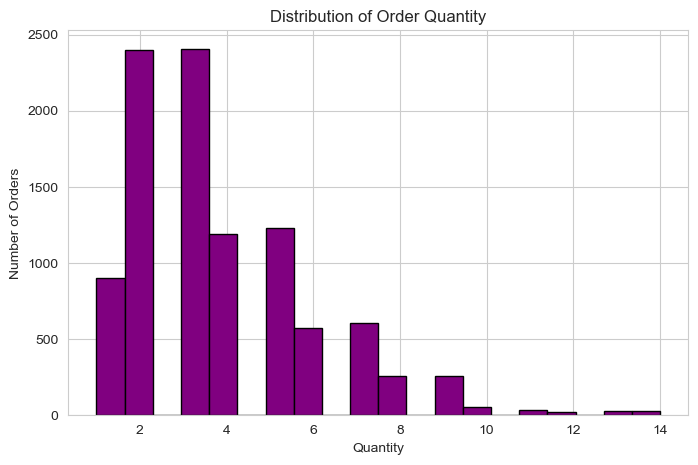

In [24]:
plt.figure(figsize=(8,5))
plt.hist(df['Quantity'], bins=20, color='purple', edgecolor='black')
plt.title("Distribution of Order Quantity")
plt.xlabel("Quantity")
plt.ylabel("Number of Orders")
plt.show()

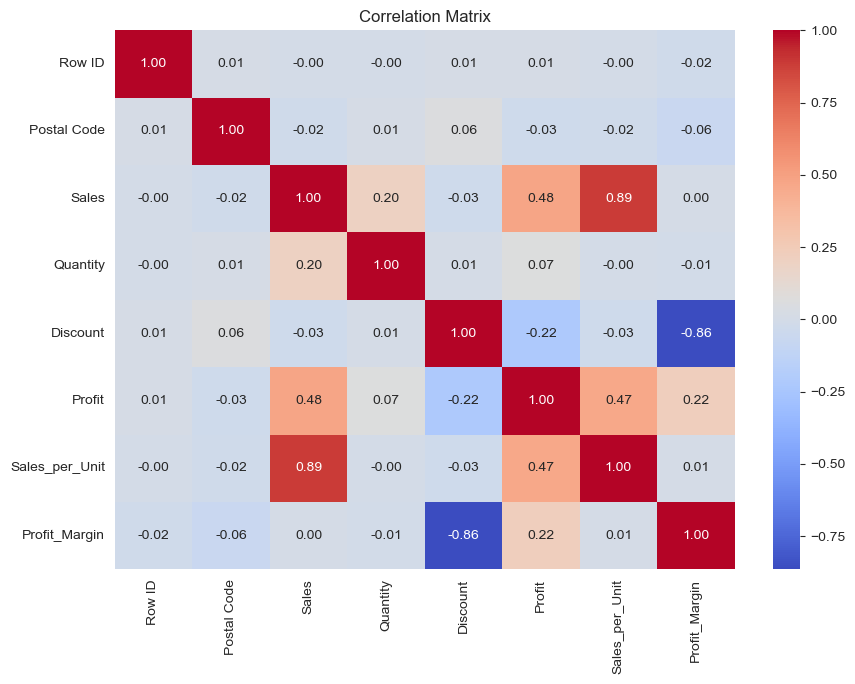

In [25]:

plt.figure(figsize=(10,7))

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64','int64'])

sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


Key Business Insights
1.High discounts often lead to low or negative profits.
2.South and West regions are more profitable.
3.Top 5 products generate majority of sales.
4.Sales peak in November–December (holiday season).
5.Low-profit orders can be flagged using Profit_Margin < 10%.

In [26]:
# Pivot table: total sales by Category and Region
pivot_category_region = pd.pivot_table(df, values='Sales', index='Category', columns='Region', aggfunc='sum')
print("Pivot Table: Sales by Category and Region")
print(pivot_category_region)

Pivot Table: Sales by Category and Region
Region               Central        East       South         West
Category                                                         
Furniture        163797.1638  208291.204  117298.684  252612.7435
Office Supplies  167026.4150  205516.055  125651.313  220853.2490
Technology       170416.3120  264973.981  148771.908  251991.8320


In [27]:
pivot_segment_profit = pd.pivot_table(df, values='Profit', index='Segment', aggfunc='sum')
print("\nPivot Table: Total Profit by Customer Segment")
print(pivot_segment_profit)


Pivot Table: Total Profit by Customer Segment
                  Profit
Segment                 
Consumer     134119.2092
Corporate     91979.1340
Home Office   60298.6785


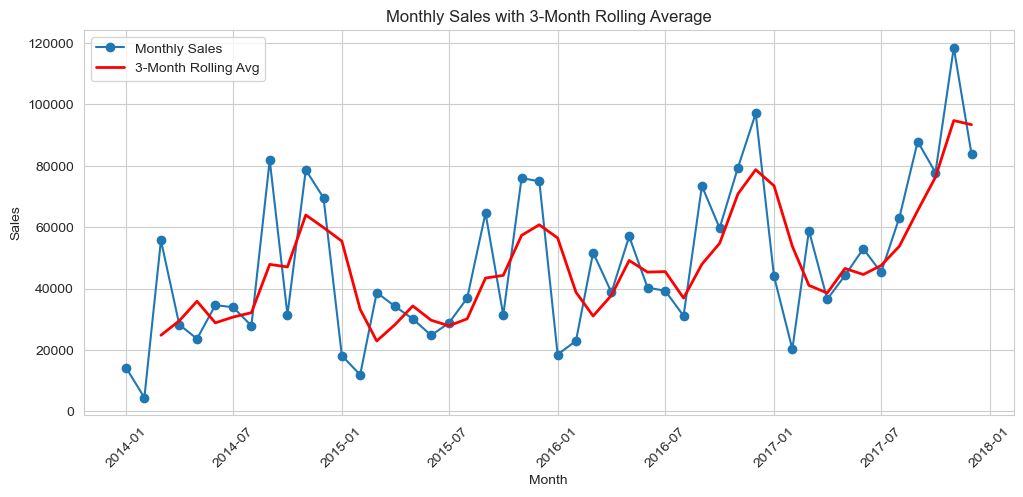

In [28]:
# Group monthly sales
monthly_sales = df.groupby('Order_Month')['Sales'].sum()

# Convert index to datetime for rolling
monthly_sales.index = pd.to_datetime(monthly_sales.index)

# Rolling average (3-month)
rolling_avg = monthly_sales.rolling(window=3).mean()

# Plot
plt.figure(figsize=(12,5))
plt.plot(monthly_sales.index, monthly_sales, label='Monthly Sales', marker='o')
plt.plot(rolling_avg.index, rolling_avg, label='3-Month Rolling Avg', color='red', linewidth=2)
plt.title("Monthly Sales with 3-Month Rolling Average")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [29]:


# Step 1: Import libraries
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

# Step 2: Prepare monthly sales data
monthly_sales = df.groupby('Order_Month')['Sales'].sum()
monthly_sales_df = monthly_sales.reset_index()

# Step 3: Create numeric month index for regression
monthly_sales_df['Month_Num'] = np.arange(len(monthly_sales_df))  # 0,1,2,...

# Step 4: Define X and y
X = monthly_sales_df[['Month_Num']]   # independent variable (month index)
y = monthly_sales_df['Sales']         # dependent variable (sales)

# Step 5: Train Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Step 6: Predict next month
next_month_num = pd.DataFrame({'Month_Num':[len(monthly_sales_df)]})
next_month_sales = model.predict(next_month_num)[0]

print("Forecasted sales for next month:", next_month_sales)

Forecasted sales for next month: 69957.53579787233
